## PyTorch Tutorial & DeepLizard CNN Series on YouTube

In [1]:
from __future__ import print_function
import torch

#### Uninitialized Matrix, is declared but does not contain definite known values

In [2]:
x = torch.empty(5, 3)
print(x)

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  1.1704e-41],
        [ 0.0000e+00,  2.2369e+08,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [        nan,         nan, -4.5862e+21]])


#### Randomly initialized matrix

In [3]:
x = torch.rand(5,3)
print(x)

tensor([[0.7283, 0.1690, 0.4126],
        [0.3335, 0.5632, 0.1026],
        [0.0210, 0.8484, 0.3009],
        [0.8955, 0.4886, 0.2778],
        [0.5867, 0.2636, 0.2787]])


In [49]:
x.shape

torch.Size([5, 2])

In [50]:
x.size()

torch.Size([5, 2])

#### Construct a matrix with zeros and data type long

In [13]:
x = torch.zeros(5, 3, dtype = torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


#### Construct a tensor directly from data

In [14]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


#### Create tensor based on existing one, these methods reuse properties of the input sensor like the dtype

In [46]:
x = x.new_zeros(5, 2, dtype = torch.float64) #new_* (ones, zeros, ...) take in the size
print(x)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]], dtype=torch.float64)


In [51]:
x = torch.randn_like(x, dtype = torch.double) #dtype is overriden 
print(x)

tensor([[ 1.5782,  1.7321],
        [-0.5274, -0.6841],
        [ 0.0571,  0.0442],
        [-0.7754,  0.8682],
        [-0.5045, -0.5877]], dtype=torch.float64)


### Operations

#### Addition can be done in two ways:

In [63]:
y = torch.rand(5, 2) #first syntax
print(x + y)

tensor([[ 2.0250,  2.5345],
        [-0.3672, -0.3670],
        [ 0.9669,  0.3353],
        [-0.3124,  1.4227],
        [-0.2825, -0.3679]], dtype=torch.float64)


In [54]:
torch.add(x, y) #second syntax

tensor([[ 2.4350e+00,  2.6342e+00],
        [-3.8693e-01, -8.4006e-02],
        [ 9.8195e-02,  7.6191e-01],
        [ 3.8493e-02,  9.8922e-01],
        [ 5.5112e-05, -3.2012e-01]], dtype=torch.float64)

In [58]:
#providing an output tensor is also possible
xy = torch.zeros(5, 2)
torch.add(x, y, out = xy)
print(xy)

tensor([[ 2.4350e+00,  2.6342e+00],
        [-3.8693e-01, -8.4006e-02],
        [ 9.8195e-02,  7.6191e-01],
        [ 3.8493e-02,  9.8922e-01],
        [ 5.5112e-05, -3.2012e-01]])


In [66]:
#...or you can do it in-line: every operation then ends with a '_'
y.add_(x) #.t_() 'transform', .copy_(x) 'copys x values'
print(y)

tensor([[-4.6149e-08,  1.7436e-08],
        [ 8.1499e-09, -2.4920e-08],
        [-1.6608e-09, -8.6048e-10],
        [-2.8191e-08,  7.3443e-09],
        [ 2.2290e-08,  4.2212e-09]])


#### NumPy like Indexing

In [69]:
print(x[:, 1])

tensor([ 1.7321, -0.6841,  0.0442,  0.8682, -0.5877], dtype=torch.float64)


### Resizing / -shaping Tensors

In [2]:
x = torch.rand(5,5)
y = x.view(25)
z = x.view(-1, 5) #-1 means to infer (ableiten) from other dimensions, shape depends on second parameter
print(x, y, z)
print(x.shape, y.shape, z.shape)

tensor([[0.8431, 0.5812, 0.3966, 0.3668, 0.7176],
        [0.6199, 0.3733, 0.5300, 0.7550, 0.4253],
        [0.5757, 0.9736, 0.5893, 0.9198, 0.7944],
        [0.2366, 0.0377, 0.3292, 0.3925, 0.8500],
        [0.1079, 0.5784, 0.4094, 0.1009, 0.9620]]) tensor([0.8431, 0.5812, 0.3966, 0.3668, 0.7176, 0.6199, 0.3733, 0.5300, 0.7550,
        0.4253, 0.5757, 0.9736, 0.5893, 0.9198, 0.7944, 0.2366, 0.0377, 0.3292,
        0.3925, 0.8500, 0.1079, 0.5784, 0.4094, 0.1009, 0.9620]) tensor([[0.8431, 0.5812, 0.3966, 0.3668, 0.7176],
        [0.6199, 0.3733, 0.5300, 0.7550, 0.4253],
        [0.5757, 0.9736, 0.5893, 0.9198, 0.7944],
        [0.2366, 0.0377, 0.3292, 0.3925, 0.8500],
        [0.1079, 0.5784, 0.4094, 0.1009, 0.9620]])
torch.Size([5, 5]) torch.Size([25]) torch.Size([5, 5])


#### use .item() to select tensor values as python number

In [84]:
x[1, 3].item()

0.8376832008361816

In [87]:
#... instead of
x[1, 3] #or x[1][3]

tensor(0.8377)

### NumPy Array <> Tensor

#### a NumPy array and a tensor share the memory location, meaning that a change of one results in a change of the other

In [89]:
a = torch.rand(3, 4)
print(a)

tensor([[0.5008, 0.0641, 0.6698, 0.1802],
        [0.6955, 0.1084, 0.2223, 0.1705],
        [0.6962, 0.1849, 0.2312, 0.5964]])


In [91]:
b = a.numpy()
print(b)

[[0.500763   0.06406945 0.66979754 0.18023556]
 [0.69545645 0.10835159 0.22226119 0.17049241]
 [0.6962485  0.18492407 0.23120284 0.5963593 ]]


In [92]:
a = a.add_(2)
print(a)

tensor([[2.5008, 2.0641, 2.6698, 2.1802],
        [2.6955, 2.1084, 2.2223, 2.1705],
        [2.6962, 2.1849, 2.2312, 2.5964]])


In [94]:
print(b) #numpy array changed according to "a" computation

[[2.500763  2.0640695 2.6697974 2.1802356]
 [2.6954565 2.1083517 2.2222612 2.1704924]
 [2.6962485 2.1849241 2.2312028 2.5963593]]


#### ...this works the other way around as well (from np to torch)

In [95]:
import numpy as np

In [107]:
a = np.ones(4)
b = torch.from_numpy(a)
print(a, '\n', b)

[1. 1. 1. 1.] 
 tensor([1., 1., 1., 1.], dtype=torch.float64)


In [108]:
np.add(a, 2, out = a)
print(a, '\n', b)

[3. 3. 3. 3.] 
 tensor([3., 3., 3., 3.], dtype=torch.float64)


####  bringing Tensors to CUDA with .to()

In [109]:
#does not work for me, no CUDA
if torch.cuda.is_available():
    device = torch.device("cuda")
    y = torch.ones_like(x, device = device) #one way
    x = x.to(device) #second possibility
    z = x+y
    z.to("cpu", torch.double) #.to() can also override dtype

## Autograd: Automatic Differentiation

#### = automatic differentiation for all operations on Tensors.

In [138]:
#creating a tensor and setting requires_grad to true to track computation
x = torch.ones(2, 2, requires_grad = True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [139]:
y = x + 2
print(y)
print(y.grad_fn)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [140]:
z = y * y * 3
out = z.mean()
print(z)
print(out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)


In [141]:
out.backward() # no need to give a tensor within backward, because out contains a single scalar

In [142]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


#### vector-Jacobian product

In [164]:
x = torch.rand(3, requires_grad = True)
y = x * 2

while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([ 65.3840, 581.7717, 856.9518], grad_fn=<MulBackward0>)


In [165]:
y.backward(torch.rand(3, dtype = torch.float))

In [166]:
x.grad

tensor([915.3042, 727.2310, 131.0215])

In [167]:
#stop autograd on tracking history on tensors
with torch.no_grad():
    print((x**2).requires_grad)

False


In [168]:
#.detach() makes new Tensor that does not require grad
r = x.detach()

## Define a Network

In [226]:
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [176]:
class Network(nn.Module): #required
    def __init__(self):
        super(Network, self).__init__() #extend the nn Module from PyTorch (inheritance)
        #in_channels= depends on number of colorspace; out_channels=feature maps, number of filters;  kernel_size=filter size
        #out_channels are often increased among the layers
        #those are all hyperparameters, weights are learnable parameters
        #optional: stride=(), tells how much the filter should move right and down
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size = 5) #kernel = filter, has height and width
        self.conv2 = nn.Conv2d(6, 12, 5)
        
        #when switching from conv to fc layers, tensor must be flattened, 
        
        #in_features = equals out_features from previous layer;
        #out_features = size of output tensor, how many nodes we want in our layer
        #out_features are often decreased among the layers, until number of output classes is reached
        #bias standardly true
        self.fc1 = nn.Linear(in_features = 12*4*4, out_features = 120) #linear, dense layers (fully connected = fc)
        self.fc2 = nn.Linear(120, 60)
        self.out = nn.Linear(60, 10)
        
    def forward(self, t): #implement the forward pass, takes tensor as arg
        # (1) input layer, normally left away
        t = t
        
        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)
        
        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)
        
        # (4) hidden linear layer (tensor is flattened)
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)
        
        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)
        
        # (6) output layer
        t = self.out(t)
        #t = F.softmax(t, dim = 1) #returns a probability for each of the prediction classes
                                    #but we don't need it, as we do a cross-entropy loss which does that implicitly
        return t
    
    #Overriding functions:
    #def __repr__(self):
     #   return "Custom String that is returned upon calling a object of this class."

In [178]:
# get an instance of your network
network = Network()
network
#dot operation
network.conv1
network.conv2

Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))

In [179]:
#access the weights of a layer, those are actually updated during learning, so that the loss function is minimized
#this is done through the Parameter class: extends Tensor class
# weights basically convert the number of in_channels to the respective number of out_channels
network.conv1.weight

Parameter containing:
tensor([[[[-1.9318e-01, -1.7595e-01,  9.6386e-02, -1.3023e-01,  8.0897e-02],
          [ 1.9020e-01,  8.9302e-02,  9.2500e-02, -1.2434e-01,  9.2441e-02],
          [-1.4880e-01, -9.0718e-02, -1.0102e-02,  2.6926e-02,  6.5431e-02],
          [ 1.9326e-01, -5.1948e-02,  1.6542e-03,  1.5422e-01,  1.2364e-01],
          [-1.8403e-01,  1.9582e-01,  4.5460e-02, -2.7600e-02,  1.2842e-01]]],


        [[[-9.6271e-02, -1.7077e-01, -1.6527e-01, -1.1869e-01,  4.2556e-02],
          [ 1.8114e-01,  1.8478e-01,  1.7345e-01, -1.8819e-01,  1.8300e-01],
          [-1.6325e-01, -1.4068e-01, -1.9204e-01, -1.2472e-01,  1.0422e-01],
          [ 4.4858e-02, -1.4175e-01, -8.5904e-02,  1.0113e-01,  1.5243e-01],
          [ 1.1321e-01, -4.3560e-02, -3.8096e-03,  1.0364e-01, -1.4136e-01]]],


        [[[ 1.2315e-01,  9.0407e-02, -1.6540e-01, -7.6472e-02, -1.1830e-01],
          [ 9.3949e-02,  2.1589e-02, -8.2750e-02,  1.1971e-01,  2.7289e-02],
          [-6.6503e-02, -4.8604e-03,  1.4141e-

In [180]:
# The shape of the weights is directly related to the hyperparameters that we specified
# This shape / Tensor represents our whole filter / layer
# Rank 4 tensors: number of filters, depth of filters, height and width of kernel / filter
network.conv2.weight.shape

torch.Size([12, 6, 5, 5])

In [181]:
# This gives us a single filter:
network.conv2.weight[0].shape

torch.Size([6, 5, 5])

In [182]:
# Linear layers have rank 2 tensors
# Height = output features, width = input features
network.fc1.weight.shape

torch.Size([120, 192])

In [185]:
#Show all parameters of the network:
for name, param in network.named_parameters():
    print(name, "\t\t", param.shape)

conv1.weight 		 torch.Size([6, 1, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 192])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])
out.weight 		 torch.Size([10, 60])
out.bias 		 torch.Size([10])


### Load Fashion MNIST Dataset

In [228]:
import torchvision
import torchvision.transforms as transforms

#### More explicit explanation in the seperat Loading Fashion MNIST Notebook

In [220]:
train_set = torchvision.datasets.FashionMNIST(
    root = "./data/FashionMNIST"
    , train = True
    , download = True
    , transform = transforms.Compose([
        transforms.ToTensor()
    ])
)

In [229]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size = 5)
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 12, kernel_size = 5)
        
        #table and formula to calculate the changes of img sizes:
        # https://deeplizard.com/learn/video/cin4YcGBh3Q
        self.fc1 = nn.Linear(in_features = 12*4*4, out_features = 120) #needed, because the img has the shape
                                                                        #(1, 12, 4, 4) when it arrives at the fc
                                                                        #because it is flattened, the input is 12*4*4
        self.fc2 = nn.Linear(in_features = 120, out_features = 60)
        self.out = nn.Linear(in_features = 60, out_features = 10)
        
    def forward(self, t):
        t = F.relu(self.conv1(t))
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)
        
        t = F.relu(self.conv2(t))
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)
        
        t = F.relu(self.fc1(t.reshape(-1, 12 * 4 * 4)))
        t = F.relu(self.fc2(t))
        
        t = self.out(t)
        #normally softmax, but is implicitly included in the cross entropy 
        return t

In [230]:
#turning computational graph off, as we do not need it yet
torch.set_grad_enabled(False)

In [231]:
network = Network()

In [194]:
sample = next(iter(train_set))

In [200]:
image, label = sample
image.shape #1 since gray, 28x28 for size

torch.Size([1, 28, 28])

In [227]:
#PyTorch only takes batches: in the format batch_size, in_channels, height, width
# if size one, we need to unsqueeze the tensor
image.unsqueeze(0).shape #gives us batch-size one

torch.Size([1, 1, 28, 28])

#### Processing a single image through our network

In [208]:
pred = network(image.unsqueeze(0))

In [210]:
pred.shape #shape means, one image in our batch, 10 prediction labels for it

torch.Size([1, 10])

In [211]:
pred

tensor([[-0.0239, -0.0650, -0.1267,  0.1285,  0.0236, -0.0431,  0.0312, -0.1431,
         -0.0683, -0.0988]])

In [213]:
label #what is the actual label for our img

9

In [219]:
pred.argmax(dim=1) #of course that is wrong, because it is totally random and guessing (not trained yet)

tensor([3])

In [223]:
#if we want those values to be probabilities, we need to use softmax
pred_prob = F.softmax(pred, dim = 1)
pred_prob

tensor([[0.1012, 0.0971, 0.0913, 0.1178, 0.1061, 0.0992, 0.1069, 0.0898, 0.0968,
         0.0939]])

In [224]:
pred_prob.argmax()

tensor(3)

In [225]:
pred_prob.sum()

tensor(1.)

#### Processing a whole batch of images through our network

In [232]:
data_loader = torch.utils.data.DataLoader(
    train_set
    , batch_size = 10
)

In [234]:
batch = next(iter(data_loader)) #always gives us the amount of images according to batch_size

In [235]:
images, labels = batch

In [237]:
images.shape #They have the proper shape to read into our network 

torch.Size([10, 1, 28, 28])

In [238]:
labels.shape #10 images in our batch, one label per image

torch.Size([10])

In [239]:
network = Network()

In [240]:
preds = network(images)

In [241]:
preds.shape #10 images, each of those elemnts has 10 prediction classes

torch.Size([10, 10])

In [242]:
preds

tensor([[ 0.1371,  0.0402,  0.0045, -0.1118, -0.1010, -0.0127, -0.0761,  0.0947,
          0.0692,  0.1365],
        [ 0.1277,  0.0440,  0.0172, -0.1112, -0.1006, -0.0030, -0.0801,  0.0978,
          0.0779,  0.1260],
        [ 0.1426,  0.0445,  0.0234, -0.1014, -0.1076, -0.0042, -0.0766,  0.1243,
          0.0960,  0.1190],
        [ 0.1384,  0.0446,  0.0182, -0.1100, -0.1017, -0.0004, -0.0797,  0.1154,
          0.0874,  0.1240],
        [ 0.1354,  0.0417,  0.0042, -0.1185, -0.0995, -0.0019, -0.0768,  0.1008,
          0.0737,  0.1299],
        [ 0.1336,  0.0538,  0.0179, -0.1117, -0.1041, -0.0045, -0.0849,  0.0957,
          0.0789,  0.1290],
        [ 0.1413,  0.0410,  0.0173, -0.1188, -0.1097, -0.0007, -0.0817,  0.1020,
          0.0857,  0.1283],
        [ 0.1316,  0.0535,  0.0165, -0.1140, -0.0991, -0.0076, -0.0840,  0.0920,
          0.0703,  0.1324],
        [ 0.1352,  0.0438,  0.0156, -0.1059, -0.0995, -0.0062, -0.0780,  0.1122,
          0.0891,  0.1213],
        [ 0.1276,  

In [250]:
preds.argmax(dim = 1) #highest prediction index for every "row" bzw. for every image

tensor([0, 0, 0, 0, 0, 0, 0, 9, 0, 0])

In [253]:
labels #correct labels of those pictures

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

In [254]:
preds.argmax(dim = 1).eq(labels) #comparing prediction to correct label

tensor([False,  True,  True, False,  True, False, False, False, False, False])

In [255]:
preds.argmax(dim = 1).eq(labels).sum() #How many?

tensor(3)

In [260]:
#Writing a function that does this for us:
def get_num_correct(predictions, labels):
    return 'Correctly classified: {}'.format(predictions.argmax(dim = 1).eq(labels).sum().item())

In [261]:
get_num_correct(preds, labels)

'Correctly classified: 3'

### Train the CNN

In [280]:
import torch.optim as optim 
torch.set_grad_enabled(True) #by default turned on

In [281]:
#Write a function that gives us the amount of correct predicted labels:
def get_num_correct(predictions, labels):
    return 'Correctly classified: {}'.format(predictions.argmax(dim = 1).eq(labels).sum().item())

In [282]:
#The network is defined above, we initialize a new one:
network = Network()

In [284]:
#Load the dataset
train_set = torchvision.datasets.FashionMNIST(
    root = "./data/FashionMNIST"
    , train = True
    , download = True
    , transform = transforms.Compose([
        transforms.ToTensor()
    ])
)

In [285]:
#Get batches from loaded train_set
train_loader = torch.utils.data.DataLoader(
    train_set
    , batch_size = 100
)
batch = next(iter(train_loader))
images, labels = batch

#### Calculating the Loss

In [286]:
preds = network(images)
loss = F.cross_entropy(preds, labels) #calculating loss with cross entropy, should decrease during training
loss.item()

2.322381019592285

#### Calculate the Gradient

In [287]:
print(network.conv1.weight.grad) #no gradients for this layer before calculating

None


In [288]:
loss.backward() #Calculating the gradients

In [289]:
network.conv1.weight.grad.shape #gradients have been updated for every weight

#this gradient tensor has the same shape as the weight tensor

torch.Size([6, 1, 5, 5])

#### Update the network weights

In [293]:
#Specifying the optimizer: we use Adam and give it the trainable parameters of our network
optimizer = optim.Adam(network.parameters(), lr = 0.01) #SGD works as well, lr = hyperparameter

In [290]:
loss.item()

2.322381019592285

In [291]:
get_num_correct(preds, labels) #makes sense, since it is only guessing

'Correctly classified: 5'

In [294]:
#Update the weights:
optimizer.step()

In [296]:
#Again, calculating the loss:
preds = network(images)
loss = F.cross_entropy(preds, labels)

In [297]:
loss.item() #should be lower now

2.2961061000823975

In [298]:
get_num_correct(preds, labels) #there we go!

'Correctly classified: 10'

### All this summarized: Training with one batch:

In [301]:
#This is a good way to test the network first, but normally everything is done in a training loop
network = Network()

train_loader = torch.utils.data.DataLoader(
    train_set
    , batch_size = 100
)
optimizer = optim.Adam(network.parameters(), lr = 0.01) #or SDG, ... lr must be tested and tuned!!!

batch = next(iter(train_loader)) #get batch
images, labels = batch

preds = network(images) #pass batch
loss = F.cross_entropy(preds, labels) #calculate loss

loss.backward() #calculate gradients backward = short for backpropagation
optimizer.step() #update weights

#--------------------------------------------------------
print("loss1: ", loss.item())
preds = network(images)
loss = F.cross_entropy(preds, labels)
print("loss2: ", loss.item()) #loss should have decreased with second iteration!

loss1:  2.2991673946380615
loss2:  2.278111457824707


#### Training all batches but only one epoch:

In [304]:
def get_num_correct(predictions, labels):
    return predictions.argmax(dim = 1).eq(labels).sum().item()

In [307]:
network = Network()

#changing the batch-size results in changing the number of times the weights are updated
# bigger batches, means less iterations, less weight updating
train_loader = torch.utils.data.DataLoader(
    train_set
    , batch_size = 100
)
optimizer = optim.Adam(network.parameters(), lr = 0.01)

total_loss = 0
total_correct = 0

for batch in train_loader: #600 iterations
    images, labels = batch

    preds = network(images) #pass batch
    loss = F.cross_entropy(preds, labels) #calculate loss
    
    optimizer.zero_grad() #must be done, because pytorch accumulates all gradients, this
                            # puts them to zero again
    loss.backward() #calculate gradients backward
    optimizer.step() #update weights
    
    total_loss += loss.item()
    total_correct += get_num_correct(preds, labels)
    
print("epoch: ", 0, "total correct: ", total_correct, "loss: ", total_loss)

epoch:  0 total correct:  46426 loss:  354.02324908971786


In [308]:
#Accuracy:
total_correct / len(train_set)

0.7737666666666667

### The training loop

In [309]:
network = Network()

train_loader = torch.utils.data.DataLoader(
    train_set
    , batch_size = 100
)
optimizer = optim.Adam(network.parameters(), lr = 0.01)
for epoch in range(5):
    
    total_loss = 0
    total_correct = 0

    for batch in train_loader:
        images, labels = batch

        preds = network(images)
        loss = F.cross_entropy(preds, labels)
    
        optimizer.zero_grad() #gradients must be put to zero, would accumulate otherwise
        loss.backward()
        optimizer.step()
    
        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)
    
    print("epoch: ", epoch, "total correct: ", total_correct, "loss: ", total_loss)

epoch:  0 total correct:  47616 loss:  327.9524929225445
epoch:  1 total correct:  51824 loss:  222.88604319095612
epoch:  2 total correct:  52574 loss:  203.97988931834698
epoch:  3 total correct:  52929 loss:  194.08124616742134
epoch:  4 total correct:  53089 loss:  188.72502356767654


In [312]:
#Accuracy:
total_correct / len(train_set)*100

88.48166666666667

##### The network improvement often hits a plateau, after it made big steps in the beginning. This means, hyperparameter tuning or other tuning should be done. What if the model sucks overall? This might be due to underfitting.

### Confusion Matrix

In [314]:
#All we need: A tensor of predictions and the corresponding labels
len(train_set)

60000

In [315]:
len(train_set.targets)

60000

In [321]:
#A function that gives us all predictions within one tensor:
def get_all_preds(model, loader):
    all_preds = torch.tensor([])
    for batch in loader:
        images, labels = batch
        
        preds = model(images) #pass the image to the model
        all_preds = torch.cat(
            (all_preds, preds)
        , dim = 0
        )
    return all_preds

In [324]:
#we should turn the gradient tracking/graph off, since we are not training the model,
# we are inferring / predicting
#This is faster and uses less memory (because of leaving away the graph)
with torch.no_grad(): #this is the locally way of turning it off, not globally
    pred_loader = torch.utils.data.DataLoader(train_set, batch_size = 5000)
    train_preds = get_all_preds(network, pred_loader)

In [323]:
#the whole training set, with the predictions for every class
train_preds.shape

torch.Size([60000, 10])

In [327]:
#Get the amount of correct preds:
preds_correct = get_num_correct(train_preds, train_set.targets)

print("total correct: ", preds_correct)
print("accuracy%: ", preds_correct / len(train_set)*100)

total correct:  53132
accuracy%:  88.55333333333333


In [329]:
#We have 10 predictions per img, so we need the highest prediction:
train_preds.argmax(dim = 1)

tensor([9, 0, 0,  ..., 3, 0, 5])

In [330]:
#Torch.stack function:
stacked = torch.stack(
    (
    train_set.targets
    , train_preds.argmax(dim = 1)
    )
    , dim = 1
)

In [331]:
stacked.shape #60.000 img with 2 values each

torch.Size([60000, 2])

In [333]:
stacked #those two values are the true label and the predicted label

tensor([[9, 9],
        [0, 0],
        [0, 0],
        ...,
        [3, 3],
        [0, 0],
        [5, 5]])

In [334]:
#How to access items in this list?
stacked[0].tolist()

[9, 9]

In [335]:
#Initiating the confusion matrix tensor
confm = torch.zeros(10, 10, dtype = torch.int64) #10x10 because of 10 labels

In [338]:
#Filling the confmatrix:
for pair in stacked:
    true, predicted = pair  #access the pair
    confm[true, predicted] = confm[true, predicted] + 1 #increase the "cell" by one
confm

tensor([[11398,    10,   184,    92,    20,     0,   236,     0,    58,     2],
        [   80, 11744,     6,   124,     6,     8,    22,     0,     6,     4],
        [  228,     0, 10266,    84,   810,     2,   560,     0,    46,     4],
        [  736,   218,    42, 10310,   440,     8,   182,     0,    32,    32],
        [   52,     8,  1128,   374,  9782,     0,   636,     0,    20,     0],
        [    2,     0,     0,     2,     0, 11344,     0,   486,     6,   160],
        [ 3336,    20,  1004,   140,   902,     6,  6490,     0,    98,     4],
        [    0,     0,     0,     0,     0,    36,     0, 11816,     6,   142],
        [   70,     8,    24,    10,    16,    26,    90,    26, 11728,     2],
        [    0,     0,     0,     0,     0,    24,     0,   582,     8, 11386]])

In [2]:
#Visualize it:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

In [350]:
#A function to plot the conf matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [351]:
#This function does exactly the same as we did
cm = confusion_matrix(train_set.targets, train_preds.argmax(dim=1))
cm

array([[5699,    5,   92,   46,   10,    0,  118,    0,   29,    1],
       [  40, 5872,    3,   62,    3,    4,   11,    0,    3,    2],
       [ 114,    0, 5133,   42,  405,    1,  280,    0,   23,    2],
       [ 368,  109,   21, 5155,  220,    4,   91,    0,   16,   16],
       [  26,    4,  564,  187, 4891,    0,  318,    0,   10,    0],
       [   1,    0,    0,    1,    0, 5672,    0,  243,    3,   80],
       [1668,   10,  502,   70,  451,    3, 3245,    0,   49,    2],
       [   0,    0,    0,    0,    0,   18,    0, 5908,    3,   71],
       [  35,    4,   12,    5,    8,   13,   45,   13, 5864,    1],
       [   0,    0,    0,    0,    0,   12,    0,  291,    4, 5693]])

Confusion matrix, without normalization
[[5699    5   92   46   10    0  118    0   29    1]
 [  40 5872    3   62    3    4   11    0    3    2]
 [ 114    0 5133   42  405    1  280    0   23    2]
 [ 368  109   21 5155  220    4   91    0   16   16]
 [  26    4  564  187 4891    0  318    0   10    0]
 [   1    0    0    1    0 5672    0  243    3   80]
 [1668   10  502   70  451    3 3245    0   49    2]
 [   0    0    0    0    0   18    0 5908    3   71]
 [  35    4   12    5    8   13   45   13 5864    1]
 [   0    0    0    0    0   12    0  291    4 5693]]


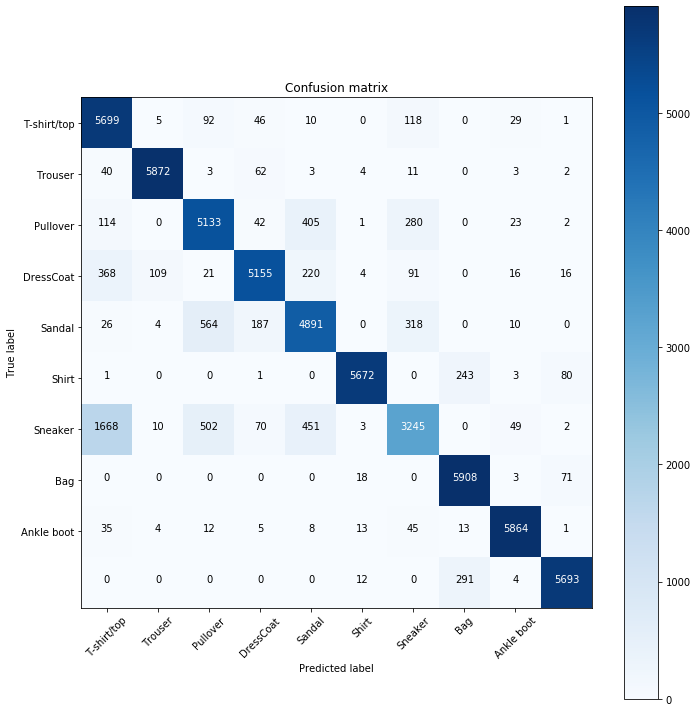

In [354]:
names = ("T-shirt/top", "Trouser", "Pullover", "DressCoat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot")
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cm, names)

In [ ]:
#We can also plot a normalized conf matrix:
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cm, names, normalize = True);